# plot_pictrl_pdfs:
## This script loops over all interpolated pre-industrial control CMIP5 Surface Air Temperature trend .npz files and plots PDF

In [1]:

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',size=12,weight='bold') #set default font size and weight for plots

#define workspace
workdir = '/Users/Karen/Desktop/Insight'
varname = 'tas'
memname = 'r1i1p1'

#load observational files and historical CMIP5 file
obs1 = np.load(workdir + '/CHAPMAN_ANN_19792005_AA_trends.npz')
AA_trend_ann_CHAP = obs1['AA_trend_ann_CHAP']
E_AA_trend_ann_CHAP = obs1['E_AA_trend_ann_CHAP']
W_AA_trend_ann_CHAP = obs1['W_AA_trend_ann_CHAP']

obs2 = np.load(workdir + '/GISTEMP_ANN_19792005_AA_trends.npz')
AA_trend_ann_GIS = obs2['AA_trend_ann_GIS']
E_AA_trend_ann_GIS = obs2['E_AA_trend_ann_GIS']
W_AA_trend_ann_GIS = obs2['W_AA_trend_ann_GIS']

obs3 = np.load(workdir + '/M10_ANN_19792005_AA_trends.npz')
AA_trend_ann_M10 = obs3['AA_trend_ann_M10']
E_AA_trend_ann_M10 = obs3['E_AA_trend_ann_M10']
W_AA_trend_ann_M10 = obs3['W_AA_trend_ann_M10']

obs4 = np.load(workdir + '/Steigv1_ANN_19792005_AA_trends.npz')
AA_trend_ann_Sv1 = obs4['AA_trend_ann_Sv1']
E_AA_trend_ann_Sv1 = obs4['E_AA_trend_ann_Sv1']
W_AA_trend_ann_Sv1 = obs4['W_AA_trend_ann_Sv1']

obs5 = np.load(workdir + '/Steigv2_ANN_19792005_AA_trends.npz')
AA_trend_ann_Sv2 = obs5['AA_trend_ann_Sv2']
E_AA_trend_ann_Sv2 = obs5['E_AA_trend_ann_Sv2']
W_AA_trend_ann_Sv2 = obs5['W_AA_trend_ann_Sv2']

hist = np.load(workdir + '/area_average_trends_CMIP5.npz')
AA_trends_hist = hist['AA_trends_all']
E_AA_trends_hist = hist['E_AA_trends_all']
W_AA_trends_hist = hist['W_AA_trends_all']

AA_trends_hist = np.mean(AA_trends_hist[0,:])
E_AA_trends_hist = np.mean(E_AA_trends_hist[0,:])
W_AA_trends_hist = np.mean(W_AA_trends_hist[0,:])

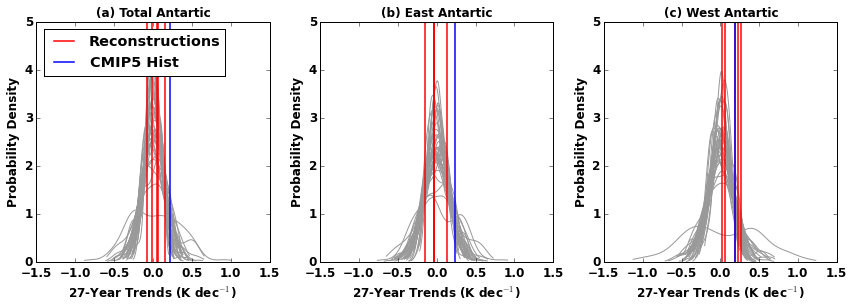

In [3]:
#define figure axes
fig = plt.figure(figsize=(12,24)) #define figure size
ax1 = plt.subplot2grid((6,12),(0,0),colspan=4) #define location of subplots
ax1.axis([-1.5,1.5,0,5]) #set x- and y-axis limits
x = np.arange(-1.5,2,0.5) #create a vector to define tick spacing for x-axis
ax1.set_xticks(x) #add ticks to x-axis
ax1.set_ylabel('Probability Density',fontsize=12,fontweight='bold') #ylabel
ax1.set_xlabel('27-Year Trends (K dec$^{-1}$)',fontsize=12,fontweight='bold') #xlabel
ax1.set_title('(a) Total Antartic',fontsize=12,fontweight='bold') #title
    
ax2 = plt.subplot2grid((6,12),(0,4),colspan=4)
ax2.axis([-1.5,1.5,0,5]) 
ax2.set_xticks(x) 
ax2.set_ylabel('Probability Density',fontsize=12,fontweight='bold') 
ax2.set_xlabel('27-Year Trends (K dec$^{-1}$)',fontsize=12,fontweight='bold')
ax2.set_title('(b) East Antartic',fontsize=12,fontweight='bold')
    
ax3 = plt.subplot2grid((6,12),(0,8),colspan=4)
ax3.axis([-1.5,1.5,0,5])
ax3.set_xticks(x) 
ax3.set_ylabel('Probability Density',fontsize=12,fontweight='bold')
ax3.set_xlabel('27-Year Trends (K dec$^{-1}$)',fontsize=12,fontweight='bold')
ax3.set_title('(c) West Antartic',fontsize=12,fontweight='bold')

#loop over models
modelfile  = open(workdir + '/pictrlmonlist_tas.txt', 'r')
modelnames = modelfile.read().splitlines()

model = 0
while model < len(modelnames):
    fname   = workdir + '/' + varname + '_' + modelnames[model] + '_' + memname + '_pictrl_27yrs.npz'
    f       = np.load(fname)
    lat     = f['lat']
    lon     = f['lon']
    AA_trends = f['AA_trends']
    E_AA_trends = f['E_AA_trends']
    W_AA_trends = f['W_AA_trends']

    AA_trend_ann = AA_trends[:,0]
    E_AA_trend_ann = E_AA_trends[:,0]
    W_AA_trend_ann = W_AA_trends[:,0]

    kernel1 = stats.gaussian_kde(AA_trend_ann)
    x1 = np.linspace(AA_trend_ann.min(), AA_trend_ann.max(), 100)
    pdf1 = kernel1(x1)
    
    kernel2 = stats.gaussian_kde(E_AA_trend_ann)
    x2 = np.linspace(E_AA_trend_ann.min(), E_AA_trend_ann.max(), 100)
    pdf2 = kernel2(x2)
    
    kernel3 = stats.gaussian_kde(W_AA_trend_ann)
    x3 = np.linspace(W_AA_trend_ann.min(), W_AA_trend_ann.max(), 100)
    pdf3 = kernel3(x3)
    
    #plot pdfs
    #subplot 1
    ax1.plot(x1, pdf1, color='0.6',linewidth=1) #simple line plot in gray
    
    #subplot 2
    ax2.plot(x2, pdf2, color='0.6',linewidth=1)
    
    #subplot 3
    ax3.plot(x3, pdf3, color='0.6',linewidth=1)
    
    model = model + 1

ax1.plot(np.squeeze(AA_trend_ann_CHAP*np.ones(x1.size)),np.linspace(0,6,x1.size),'r',label = 'Reconstructions',linewidth=1.5)
ax1.plot(np.squeeze(AA_trend_ann_GIS*np.ones(x1.size)),np.linspace(0,6,x1.size),'r',linewidth=1.5)
ax1.plot(np.squeeze(AA_trend_ann_M10*np.ones(x1.size)),np.linspace(0,6,x1.size),'r',linewidth=1.5)
ax1.plot(np.squeeze(AA_trend_ann_Sv1*np.ones(x1.size)),np.linspace(0,6,x1.size),'r',linewidth=1.5)
ax1.plot(np.squeeze(AA_trend_ann_Sv2*np.ones(x1.size)),np.linspace(0,6,x1.size),'r',linewidth=1.5)
ax1.plot(np.squeeze(AA_trends_hist*np.ones(x1.size)),np.linspace(0,6,x1.size),'b',label = 'CMIP5 Hist',linewidth=1.5)
ax1.legend(loc='upper left') #adds legend to subplot

#subplot 2
ax2.plot(np.squeeze(E_AA_trend_ann_CHAP*np.ones(x2.size)),np.linspace(0,6,x2.size),'r',label = 'Reconstructions',linewidth=1.5)
ax2.plot(np.squeeze(E_AA_trend_ann_GIS*np.ones(x2.size)),np.linspace(0,6,x2.size),'r',linewidth=1.5)
ax2.plot(np.squeeze(E_AA_trend_ann_M10*np.ones(x2.size)),np.linspace(0,6,x2.size),'r',linewidth=1.5)
ax2.plot(np.squeeze(E_AA_trend_ann_Sv1*np.ones(x2.size)),np.linspace(0,6,x2.size),'r',linewidth=1.5)
ax2.plot(np.squeeze(E_AA_trend_ann_Sv2*np.ones(x2.size)),np.linspace(0,6,x2.size),'r',linewidth=1.5)
ax2.plot(np.squeeze(E_AA_trends_hist*np.ones(x2.size)),np.linspace(0,6,x2.size),'b',label = 'CMIP5 Hist',linewidth=1.5)

#subplot 3
ax3.plot(np.squeeze(W_AA_trend_ann_CHAP*np.ones(x3.size)),np.linspace(0,6,x3.size),'r',label = 'Reconstructions',linewidth=1.5)
ax3.plot(np.squeeze(W_AA_trend_ann_GIS*np.ones(x3.size)),np.linspace(0,6,x3.size),'r',linewidth=1.5)
ax3.plot(np.squeeze(W_AA_trend_ann_M10*np.ones(x3.size)),np.linspace(0,6,x3.size),'r',linewidth=1.5)
ax3.plot(np.squeeze(W_AA_trend_ann_Sv1*np.ones(x3.size)),np.linspace(0,6,x3.size),'r',linewidth=1.5)
ax3.plot(np.squeeze(W_AA_trend_ann_Sv2*np.ones(x3.size)),np.linspace(0,6,x3.size),'r',linewidth=1.5)
ax3.plot(np.squeeze(W_AA_trends_hist*np.ones(x3.size)),np.linspace(0,6,x3.size),'b',label = 'CMIP5 Hist',linewidth=1.5)

plt.tight_layout()